# REPORT : Predict Stress in English Words

##  SYSU 谢轩 15310053


这次project比较好玩，预测单词重音，是以前没有遇到过的课题。因为当时课程讲的太快，五天时间急匆匆地讲完，很多内容还没有消化，通过这个project，可以促进对课程内容的理解。

# Classifier的选择

老师在课上用了挺多时间讲过分类这一方法。分类是一种重要的数据分析形式，它提取刻画重要数据类的模型。这种模型称为分类器，预测分类的类标号。

如果把机器学习归为两大类，那么主要的工作可以分为：分类和聚类。而分类任务基本上占整个机器学习或者是数据挖掘领域的70%,可见我们遇到的很多问题，都可以用分类的算法进行解决。机器学习发展到现在，许多被证实有效的分类算法被提出，例如我们经常会用到的K-近邻分类器、朴素贝叶斯分类器决策树算法等。平时在用的时候可能并不太清楚每种分类算法适合哪种类型的数据，因为对于不同的数据集，上述算法的效果可能有很大的区别，所以了解每种分类器的特点对于解决实际问题有很大的帮助。

## 1.决策树（Decision Tree, DT）

DT容易理解与解释（对某些人而言——不确定我是否也在他们其中）。DT是非参数的，所以你不需要担心野点（或离群点）和数据是否线性可分的问题（例如，DT可以轻松的处理这种情况：属于A类的样本的特征x取值往往非常小或者非常大，而属于B类的样本的特征x取值在中间范围）。DT的主要缺点是容易过拟合。

In [ ]:
from sklearn import tree
from sklearn.cross_validation import train_test_split 
from sklearn.metrics import f1_score 

#一般有entropy和gini两种系数
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = tree.DecisionTreeClassifier(criterion='gini')

## 2.朴素贝叶斯(Naive Bayes, NB)

超级简单，就像做一些数数的工作。如果条件独立假设成立的话，NB将比鉴别模型（如Logistic回归）收敛的更快，所以你只需要少量的训练数据。即使条件独立假设不成立，NB在实际中仍然表现出惊人的好。如果你想做类似半监督学习，或者是既要模型简单又要性能好，NB值得尝试。

In [ ]:
#这个是贝叶斯线性回归
from sklearn import linear_model
clf_bayes = linear_model.BayesianRidge()
clf_bayes.fit(x_train, y_train)
answer = clf_bayes.predict(x_train).round() #取整
answer2 = clf_bayes.predict(x_test).round()
print('f1 for train = ' , f1_score(y_train, answer, average='micro'))
print('f1 for test = ' , f1_score(y_test, answer2, average='micro'))

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
#调用MultinomialNB分类器

clf = MultinomialNB()
clf = GaussianNB()
clf = BernoulliNB()
#doc_class_predicted = clf.predict(x_test)

另外还有其他的朴素贝叶斯分类器如GaussianNB适用于高斯分布（正态分布）的特征，而BernoulliNB适用于伯努利分布（二值分布）的特征

## 3.Logistic回归(Logistic Regression, LR)

LR有很多方法来对模型正则化。比起NB的条件独立性假设，LR不需要考虑样本是否是相关的。与决策树与支持向量机（SVM）不同，NB有很好的概率解释，且很容易利用新的训练数据来更新模型（使用在线梯度下降法）。如果你想要一些概率信息（如，为了更容易的调整分类阈值，得到分类的不确定性，得到置信区间），或者希望将来有更多数据时能方便的更新改进模型，LR是值得使用的。

In [ ]:
from sklearn.linear_model import LogisticRegression

#加载数据集，切分数据集80%训练，20%测试
x_train, x_test, y_train, y_test\
= train_test_split(movie_data, movie_target, test_size = 0.2)
   

    #训练LR分类器
clf = LogisticRegression()
clf.fit(x_train, y_train)

## 4.KNN分类算法

KNN分类算法（K-Nearest-Neighbors Classification），又叫K近邻算法，是一个概念极其简单，而分类效果又很优秀的分类算法。

他的核心思想就是，要确定测试样本属于哪一类，就寻找所有训练样本中与该测试样本“距离”最近的前K个样本，然后看这K个样本大部分属于哪一类，那么就认为这个测试样本也属于哪一类。简单的说就是让最相似的K个样本来投票决定。


In [ ]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(algorithm='kd_tree')


# 最终选择

最初我们小组还想用聚类的方法，但后来放弃了，还是用回分类的方法。
经过试验和根据我们选定的feature，我们决定使用参数为entropy的决策树算法，因为f1是最高的。

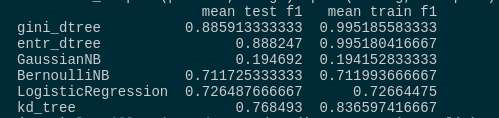